In [105]:
from tqdm import tqdm
import wandb
api = wandb.Api(timeout=180)
import os
import pandas as pd
import wandb
import yaml
from pathlib import Path
from copy import deepcopy
import torch
import matplotlib.pyplot as plt
import numpy as np
import argparse
import itertools
import  matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import itertools
import time
import matplotlib as mpl
import matplotlib.ticker as ticker


In [106]:
USER='wilderlavington' 
PROJECT='FuncOptCleanRuns'
SUMMARY_FILE='FuncOptSVMlibFinal.csv'  
try:
    os.makedirs("plots/aistats/")
except FileExistsError:
    print("File already exists")

File already exists


In [107]:
%run plotting_utils.py

In [108]:
def download_wandb_summary(user, project, summary_file):
    """
    Download a summary of all runs on the wandb project
    """
    runs = api.runs(user+'/'+project, per_page=1e7)
    summary_list, config_list, name_list, id_list, commits = [], [], [], [], []
    assert len([run for run in runs])
    for run in tqdm(runs):
        run = api.run(user+'/'+project+"/"+run.id)
        conf = {k: v for k, v in run.config.items()}  
        if 'dataset_name' in conf.keys(): 
            if conf['dataset_name'] in ['ijcnn', 'rcv1', 'mushrooms']:
                summary_list.append(run.summary._json_dict)
                config_list.append(conf)
                name_list.append(run.name)
                id_list.append(run.id)
                if run.commit is not None:
                    commits.append(run.commit)
                else:
                    commits.append('None')
    assert len(summary_list)
    commits_df = pd.DataFrame.from_records(commits)
    summary_df = pd.DataFrame.from_records(summary_list)
    config_df = pd.DataFrame.from_records(config_list)
    name_df = pd.DataFrame({"name": name_list, "id": id_list})
    all_df = pd.concat([name_df, config_df, summary_df, commits_df], axis=1)
    Path('logs/wandb_data/').mkdir(parents=True, exist_ok=True)
    all_df.to_csv('logs/wandb_data/'+summary_file)
    return all_df
#

In [109]:
download_wandb_summary(user=USER, project=PROJECT, summary_file=SUMMARY_FILE)

100%|███████████████████████████████████████| 5425/5425 [16:09<00:00,  5.60it/s]


name        id    c   m             algo  \
0             light-snow-6736  qsplwtm1  0.1  20  Diag_Ada_FMDOpt   
1       glorious-morning-6725  p24cmnv8  0.1  20       SLS_FMDOpt   
2            worthy-bird-6724  is5ylrqm  0.1  20       SLS_FMDOpt   
3               rich-sun-6722  hd83an9l  0.1  10       SLS_FMDOpt   
4            noble-voice-6721  1zkm8w9c  0.1  10       SLS_FMDOpt   
...                       ...       ...  ...  ..              ...   
5071             dry-eon-2406  7xro1jh3  0.1   5       SGD_FMDOpt   
5072  glorious-resonance-2402  uq0wzd4q  0.1  10       SGD_FMDOpt   
5073     giddy-resonance-2396  2p3k5xeg  0.1   5       SGD_FMDOpt   
5074    likely-firebrand-2380  25pnwury  0.1  10       SGD_FMDOpt   
5075      logical-flower-2378  1411w4u5  0.1  10       SGD_FMDOpt   

                   loss  seed           group          label           entity  \
0     BCEWithLogitsLoss     3  AIstats_narval  workshop-fig1  wilderlavington   
1               MSELoss     1  AIstats_narval  workshop-fig2  wilderlavington   
2               MSELoss     2  AIstats_narval  workshop-fig2  wilderlavington   
3               MSELoss     1  AIstats_narval  workshop-fig2  wilderlavington   
4               MSELoss     3  AIstats_narval  workshop-fig2  wilderlavington   
...                 ...   ...             ...            ...              ...   
5071  BCEWithLogitsLoss     1  AIstats_narval  workshop-fig2  wilderlavington   
5072            MSELoss     3  AIstats_narval  workshop-fig1  wilderlavington   
5073            MSELoss     3  AIstats_narval  workshop-fig1  wilderlavington   
5074            MSELoss     1  AIstats_narval  workshop-fig2  wilderlavington   
5075            MSELoss     1  AIstats_narval  workshop-fig2  wilderlavington   

      log_lr                                            log_dir  outer_c  \
0         -4  ./wandb./configs/aistats/svmlib/Diag_Ada_FMDOp...      0.5   
1         -4                                            ./wandb      0.5   
2         -4                                            ./wandb      0.5   
3         -4                                            ./wandb      0.5   
4         -4                                            ./wandb      0.5   
...      ...                                                ...      ...   
5071      -4                                                NaN      0.5   
5072      -4                                                NaN      0.5   
5073      -4                                                NaN      0.5   
5074      -4                                                NaN      0.5   
5075      -4                                                NaN      0.5   

                          project  episodes file_name  fullbatch inner_opt  \
0     FunctionalOptimizationFinal       100   example          1     LSOpt   
1     FunctionalOptimizationFinal       100   example          1     LSOpt   
2     FunctionalOptimizationFinal       100   example          1     LSOpt   
3     FunctionalOptimizationFinal       100   example          1     LSOpt   
4     FunctionalOptimizationFinal       100   example          1     LSOpt   
...                           ...       ...       ...        ...       ...   
5071       FunctionalOptimization       100   example          0     LSOpt   
5072       FunctionalOptimization       100   example          0     LSOpt   
5073       FunctionalOptimization       100   example          0     LSOpt   
5074       FunctionalOptimization       100   example          0     LSOpt   
5075       FunctionalOptimization       100   example          0     LSOpt   

      batch_size  min_epochs  beta_update folder_name  gulf2_alpha  \
0            100         500          0.9   examples/          0.3   
1            100         500          0.9   examples/          0.3   
2            100         500          0.9   examples/          0.3   
3            100         500          0.9   examples/          0.3   
4            100       

In [110]:
download_wandb_records(user=USER, project=PROJECT, summary_file=SUMMARY_FILE)

100%|███████████████████████████████████████| 5076/5076 [35:58<00:00,  2.35it/s]


Unnamed: 0                 name        id    c   m             algo  \
0             0      light-snow-6736  qsplwtm1  0.1  20  Diag_Ada_FMDOpt   
1             0      light-snow-6736  qsplwtm1  0.1  20  Diag_Ada_FMDOpt   
2             0      light-snow-6736  qsplwtm1  0.1  20  Diag_Ada_FMDOpt   
3             0      light-snow-6736  qsplwtm1  0.1  20  Diag_Ada_FMDOpt   
4             0      light-snow-6736  qsplwtm1  0.1  20  Diag_Ada_FMDOpt   
..          ...                  ...       ...  ...  ..              ...   
315        5075  logical-flower-2378  1411w4u5  0.1  10       SGD_FMDOpt   
316        5075  logical-flower-2378  1411w4u5  0.1  10       SGD_FMDOpt   
317        5075  logical-flower-2378  1411w4u5  0.1  10       SGD_FMDOpt   
318        5075  logical-flower-2378  1411w4u5  0.1  10       SGD_FMDOpt   
319        5075  logical-flower-2378  1411w4u5  0.1  10       SGD_FMDOpt   

                  loss  seed           group          label           entity  \
0    BCEWithLogitsLoss     3  AIstats_narval  workshop-fig1  wilderlavington   
1    BCEWithLogitsLoss     3  AIstats_narval  workshop-fig1  wilderlavington   
2    BCEWithLogitsLoss     3  AIstats_narval  workshop-fig1  wilderlavington   
3    BCEWithLogitsLoss     3  AIstats_narval  workshop-fig1  wilderlavington   
4    BCEWithLogitsLoss     3  AIstats_narval  workshop-fig1  wilderlavington   
..                 ...   ...             ...            ...              ...   
315            MSELoss     1  AIstats_narval  workshop-fig2  wilderlavington   
316            MSELoss     1  AIstats_narval  workshop-fig2  wilderlavington   
317            MSELoss     1  AIstats_narval  workshop-fig2  wilderlavington   
318            MSELoss     1  AIstats_narval  workshop-fig2  wilderlavington   
319            MSELoss     1  AIstats_narval  workshop-fig2  wilderlavington   

     log_lr                                            log_dir  outer_c  \
0        -4  ./wandb./configs/aistats/svmlib/Diag_Ada_FMDOp...      0.5   
1        -4  ./wandb./configs/aistats/svmlib/Diag_Ada_FMDOp...      0.5   
2        -4  ./wandb./configs/aistats/svmlib/Diag_Ada_FMDOp...      0.5   
3        -4  ./wandb./configs/aistats/svmlib/Diag_Ada_FMDOp...      0.5   
4        -4  ./wandb./configs/aistats/svmlib/Diag_Ada_FMDOp...      0.5   
..      ...                                                ...      ...   
315      -4                                                NaN      0.5   
316      -4                                                NaN      0.5   
317      -4                                                NaN      0.5   
318      -4                                                NaN      0.5   
319      -4                                                NaN      0.5   

                         project  episodes file_name  fullbatch inner_opt  \
0    FunctionalOptimizationFinal       100   example          1     LSOpt   
1    FunctionalOptimizationFinal       100   example          1     LSOpt   
2    FunctionalOptimizationFinal       100   example          1     LSOpt   
3    FunctionalOptimizationFinal       100   example          1     LSOpt   
4    FunctionalOptimizationFinal       100   example          1     LSOpt   
..                           ...       ...       ...        ...       ...   
315       FunctionalOptimization       100   example          0     LSOpt   
316       FunctionalOptimization       100   example          0     LSOpt   
317       FunctionalOptimization       100   example          0     LSOpt   
318       FunctionalOptimization       100   example          0     LSOpt   
319       FunctionalOptimization       100   example          0     LSOpt   

     batch_size  min_epochs  beta_update folder_name  gulf2_alpha  \
0           100         500          0.9   examples/          0.3   
1           100         500          0.9   examples/          0.3   
2           100         500          0.9   examples/          0.3   
3           100         500  

In [111]:
def generate_appendix_figure(loss, schedule, wandb_records, sso_algo, x ='optim_steps', y='avg_loss'):
    
    # base info   
    dataset_names = ['mushrooms', 'ijcnn', 'rcv1']
    batch_sizes = [25, 125, 625]
    m = [1, 5, 10, 20] 
#     wandb_records = wandb_records[wandb_records['group']=='AIstats_narval']
    # init plots 
    fig, axs = plt.subplots(len(dataset_names), len(batch_sizes)+1, figsize=(16, 5))
    colors = mpl.cm.Set1.colors   # Qualitative colormap
    colormap = {'SGD': '#44AA99' , 'SLS': '#DDCC77', 'Adam': '#88CCEE', 'Adagrad': '#003f5c'}
    colormap.update({'SSO-1':  '#CC6677' ,  'SSO-5': '#AA4499', 'SSO-10': '#882255' , 'SSO-20': '#332288'})
    algorithms = ['SGD', 'Adam', 'SLS', 'Adagrad'] + ['SSO-'+str(m_) for m_ in m] 
    label_map = {x:'Optimization-Steps', y:'Gradient-Norm'}
    
    # now add in the lines to each of the plots 
    for row, dataset_name in enumerate(dataset_names):
        
        # figure out axis automatically 
        x_max = 0 

        # SLS
        proc_df = format_dataframe(wandb_records,
            id_subfields={'fullbatch': 1,  
            'use_optimal_stepsize': 1, 'loss': loss, 'algo': 'LSOpt',
            'eta_schedule': schedule, 'dataset_name': dataset_name},
            x_col=x , y_col=y) 
        if proc_df is not None:
            x_max = max(proc_df[x].values.max(), x_max)
            axs[row][-1] = generate_plot(proc_df, x, y, axs[row][-1], label='SLS', 
                                         linestyle='dashed', color=colormap['SLS'])
        else:
            print('missing SLS  ', dataset_name, 'full-batch')

        # SGD
        proc_df = format_dataframe(wandb_records,
            id_subfields={'fullbatch': 1,  
            'use_optimal_stepsize': 1, 'loss': loss, 'algo': 'SGD',
            'eta_schedule': schedule, 'dataset_name': dataset_name},
            x_col=x , y_col=y) 
        if proc_df is not None: 
            x_max = max(proc_df[x].values.max(), x_max)
            axs[row][-1] = generate_plot(proc_df, x, y, axs[row][-1], label='SGD', 
                                         linestyle='dashed', color=colormap['SGD'])
        else:
            print('missing SGD  ', dataset_name, 'full-batch', loss)
        
        # Adam
        proc_df = format_dataframe(wandb_records,
            id_subfields={'fullbatch': 1,  
            'use_optimal_stepsize': 1, 'loss': loss, 'algo': 'Adam',
            'eta_schedule': 'constant', 'dataset_name': dataset_name},
            x_col=x , y_col=y) 
        if proc_df is not None: 
            x_max = max(proc_df[x].values.max(), x_max)
            axs[row][-1] = generate_plot(proc_df, x, y, axs[row][-1], label='Adam', 
                                         linestyle='dashed', color=colormap['Adam'])
        else:
            print('missing Adam  ', dataset_name, 'full-batch', loss)
            
        # Adagrad
        proc_df = format_dataframe(wandb_records,
            id_subfields={'fullbatch': 1,  
            'use_optimal_stepsize': 1, 'loss': loss, 'algo': 'Adagrad',
            'eta_schedule': 'constant', 'dataset_name': dataset_name},
            x_col=x , y_col=y) 
        if proc_df is not None: 
            x_max = max(proc_df[x].values.max(), x_max)
            axs[row][-1] = generate_plot(proc_df, x, y, axs[row][-1], label='Adagrad', 
                                         linestyle='dashed', color=colormap['Adagrad'])
        else:
            print('missing Adagrad  ', dataset_name, 'full-batch', loss)
            
        # FMDopt theoretical 
        for m_ in m:
            # create parsed info 
            proc_df = format_dataframe(wandb_records, 
                id_subfields={'fullbatch': 1,   
                    'use_optimal_stepsize': 1, 
                    'loss': loss, 'algo': sso_algo, 'm': m_,
                    'eta_schedule': schedule, 'dataset_name': dataset_name}, 
                     avg_subfields=['seed'], max_subfields=['c'],
                x_col=x, y_col=y)
            if proc_df is not None:
                x_max = max(proc_df[x].values.max(), x_max)
                axs[row][-1] = generate_plot(proc_df, x, y, axs[row][-1],  \
                                        label='SSO-'+str(m_), linestyle='solid', color=colormap['SSO-'+str(m_)])
            else:
                print('missing FMDopt  ', m_, dataset_name, 'full-batch', loss) 
        axs[row][-1].grid()     
        axs[row][-1].set_yscale("log")
        axs[row][-1].set_xscale("log") 
        
        # mini-batch plots 
        for col, batch_size in enumerate(batch_sizes):
            
            # figure out axis automatically 
            x_max = 0 
            
            # SLS
            proc_df = format_dataframe(wandb_records,
                id_subfields={'batch_size': batch_size,  #'_step': 499.0,
                'use_optimal_stepsize': 1, 'loss': loss, 'algo': 'LSOpt',
                'eta_schedule': schedule, 'dataset_name': dataset_name},
                x_col=x , y_col=y) 
            if proc_df is not None:
                x_max = max(proc_df[x].values.max(), x_max)
                axs[row][col] = generate_plot(proc_df, x, y, axs[row][col], label='SLS', 
                                             linestyle='dashed', color=colormap['SLS'])
            else:
                print('missing SLS  ', dataset_name, batch_size, loss)
            
            # SGD
            proc_df = format_dataframe(wandb_records,
                id_subfields={'batch_size': batch_size, #'_step': 499.0,
                'use_optimal_stepsize': 1, 'loss': loss, 'algo': 'SGD',
                'eta_schedule': schedule, 'dataset_name': dataset_name},
                x_col=x , y_col=y) 
            if proc_df is not None: 
                x_max = max(proc_df[x].values.max(), x_max)
                axs[row][col] = generate_plot(proc_df, x, y, axs[row][col], label='SGD', 
                                             linestyle='dashed', color=colormap['SGD'])
            else:
                print('missing SGD  ', dataset_name, batch_size, loss)
            
            # Adam
            proc_df = format_dataframe(wandb_records,
                id_subfields={'batch_size': batch_size, #'_step': 499.0,  
                'use_optimal_stepsize': 1, 'loss': loss, 'algo': 'Adam',
                'eta_schedule': 'constant', 'dataset_name': dataset_name},
                x_col=x , y_col=y) 
            if proc_df is not None: 
                x_max = max(proc_df[x].values.max(), x_max)
                axs[row][col] = generate_plot(proc_df, x, y, axs[row][col], label='Adam', 
                                             linestyle='dashed', color=colormap['Adam'])
            else:
                print('missing Adam  ', dataset_name, batch_size, loss)
            
            # Adagrad
            proc_df = format_dataframe(wandb_records,
                id_subfields={'batch_size': batch_size, #'_step': 499.0,   
                'use_optimal_stepsize': 1, 'loss': loss, 'algo': 'Adagrad',
                'eta_schedule': 'constant', 'dataset_name': dataset_name},
                x_col=x , y_col=y) 
            if proc_df is not None: 
                x_max = max(proc_df[x].values.max(), x_max)
                axs[row][col] = generate_plot(proc_df, x, y, axs[row][col], label='Adagrad', 
                                             linestyle='dashed', color=colormap['Adagrad'])
            else:
                print('missing Adagrad  ', dataset_name, 'full-batch', loss)
            
            # FMDopt theoretical 
            for m_ in m:
                # create parsed info 
                proc_df = format_dataframe(wandb_records, 
                    id_subfields={'batch_size': batch_size,  
                        'use_optimal_stepsize': 1, #'_step': 499.0,
                        'loss': loss, 'algo': sso_algo, 'm': m_,
                        'eta_schedule': schedule, 'dataset_name': dataset_name}, 
                         avg_subfields=['seed'], max_subfields=['c'],
                    x_col=x, y_col=y)
                if proc_df is not None:
                    x_max = max(proc_df[x].values.max(), x_max)
                    axs[row][col] = generate_plot(proc_df, x, y, axs[row][col], \
                                            label='SSO-'+str(m_), linestyle='solid', color=colormap['SSO-'+str(m_)])
                else:
                    print('missing FMDopt  ', m_, dataset_name, batch_size, loss) 
            
            axs[row][col].grid()     
            axs[row][col].ticklabel_format(axis='x', style='sci', scilimits=(0,0))
            axs[row][col].yaxis.set_major_locator(plt.MaxNLocator(4))
            axs[row][col].set_yscale("log")
            axs[row][col].set_xscale("log")
            axs[0][col].set_title('batch-size: '+str(batch_size), fontsize=14)
            axs[0][-1].set_title('full-batch', fontsize=14)
            axs[row][-1].set_ylabel(dataset_name, fontsize=14)
            axs[row][-1].yaxis.set_label_position("right") 
        
        axs[row][col].xaxis.set_minor_locator(mpl.ticker.LogLocator(base=10,numticks=100))
        axs[row][col].xaxis.set_minor_formatter(mpl.ticker.NullFormatter()) 
        axs[row][col].yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
        
    # remaining format stuff  
    handles = [mpatches.Patch(color=colormap[algo], label=algo) for algo in algorithms]
    leg = fig.legend(handles=handles,
           loc="lower center",   # Position of legend
           borderaxespad=1.65,    # Small spacing around legend box
           # title="Algorithms",  # Title for the legend
           fontsize=14,
           ncol=8, 
           bbox_to_anchor=(0.525, -0.16),
           )
    
    plt.subplots_adjust(hspace=1.5)
    plt.rcParams['figure.dpi'] = 100# 400 
    fig.tight_layout()
    
    # show / save
    plt.savefig('plots/aistats/workshop-sls_sso-'+sso_algo+loss+schedule+'.pdf', bbox_inches='tight')
    plt.show() 

In [112]:
 wandb_records = pd.read_csv('logs/wandb_data/__full__'+SUMMARY_FILE, header=0, squeeze=True)

/home/wlavington/Desktop/mujoco_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (13,53,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


constant


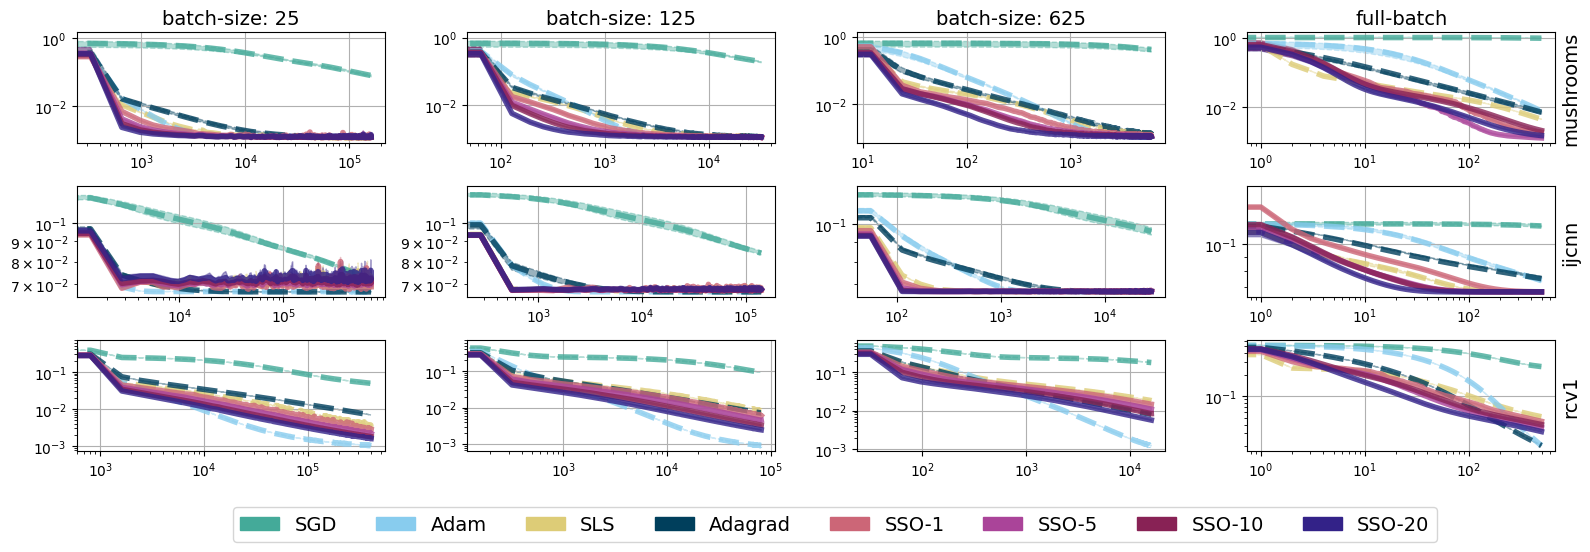

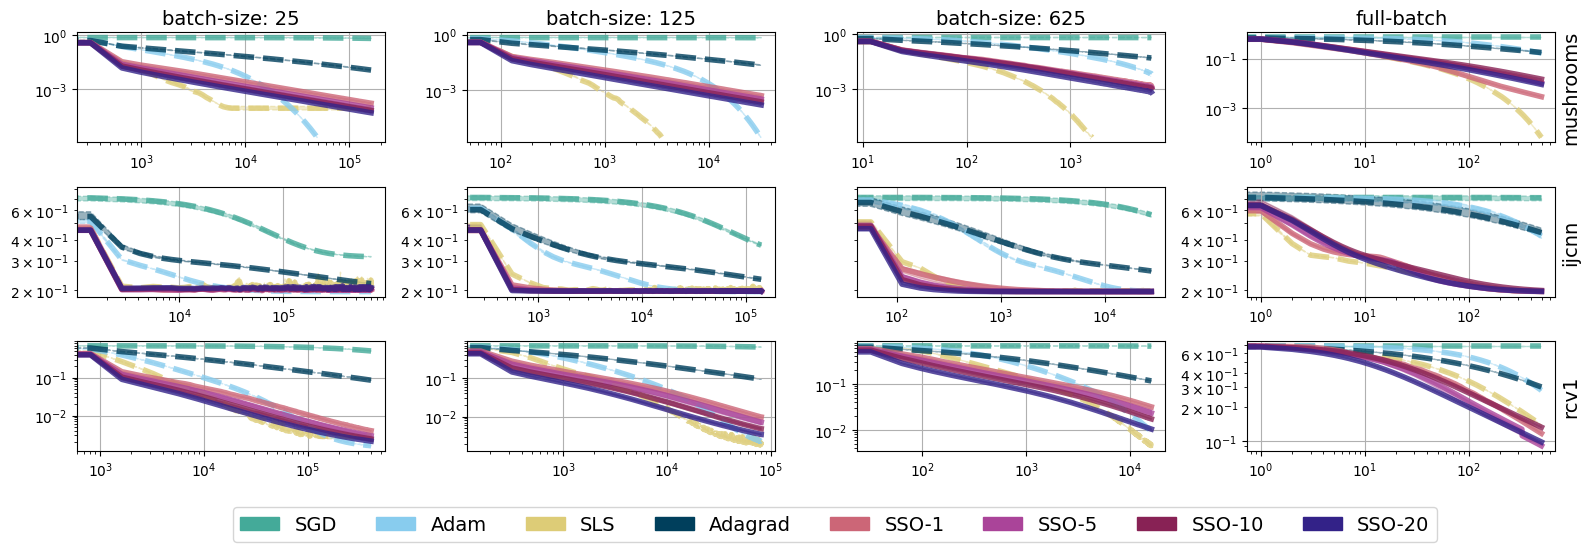

stochastic


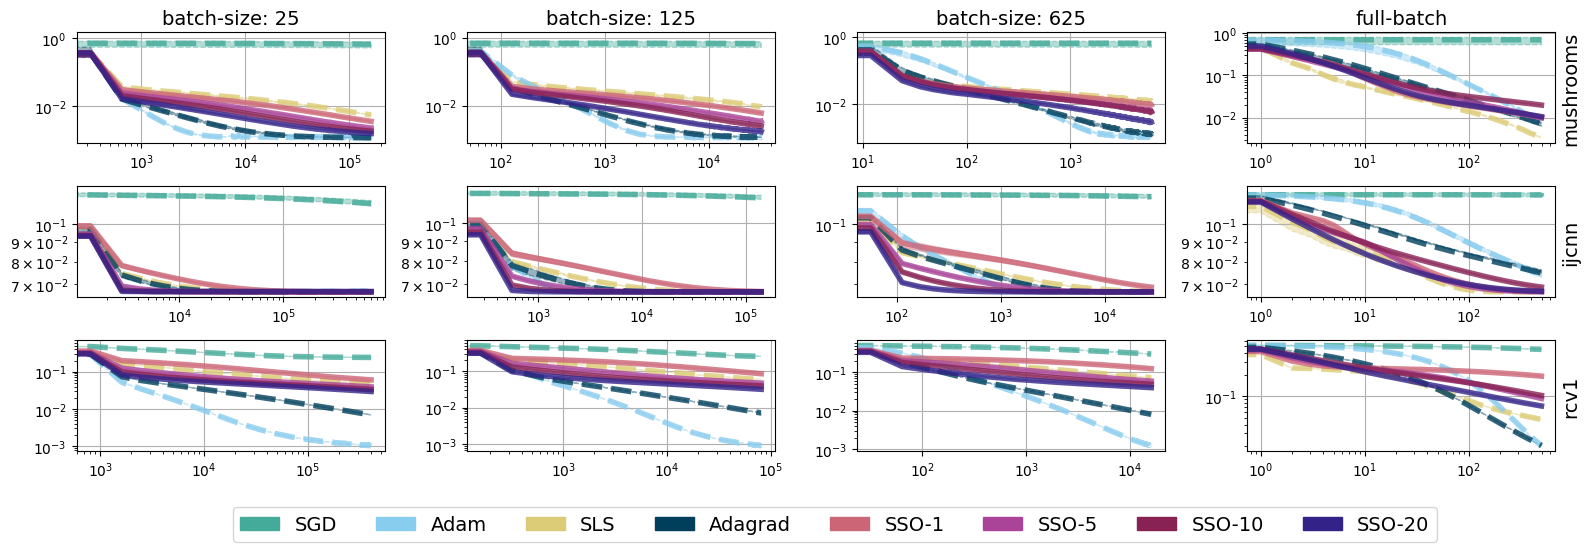

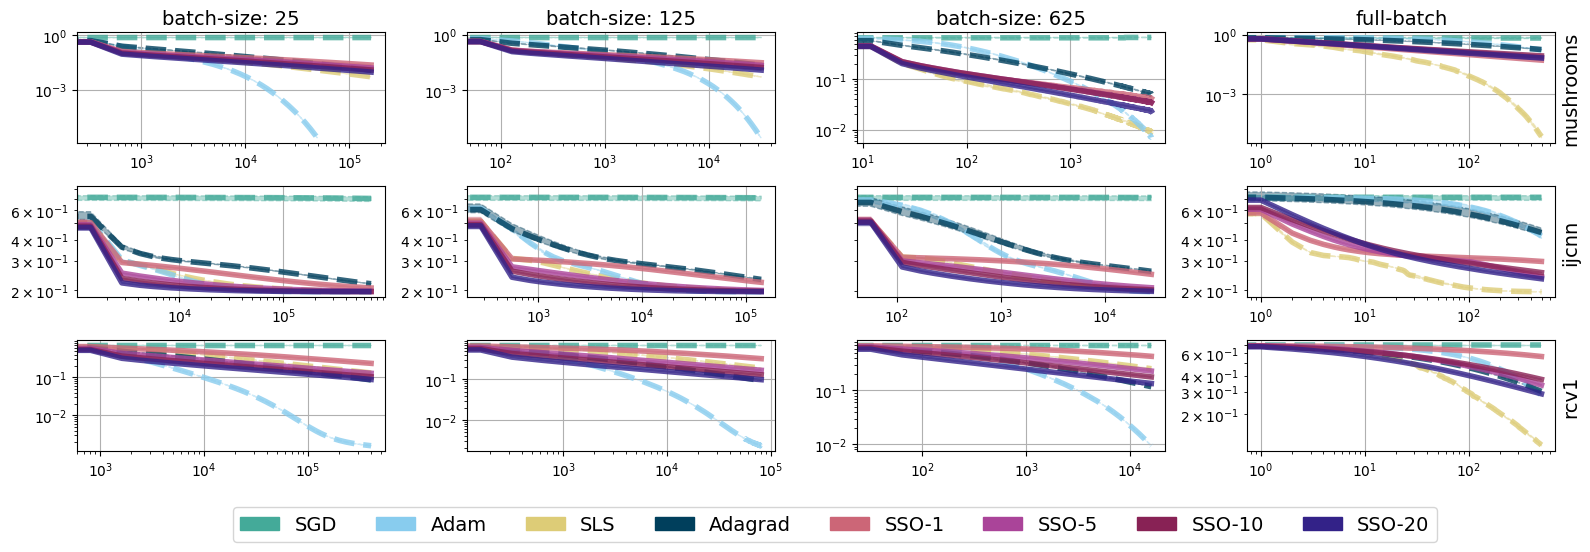

exponential


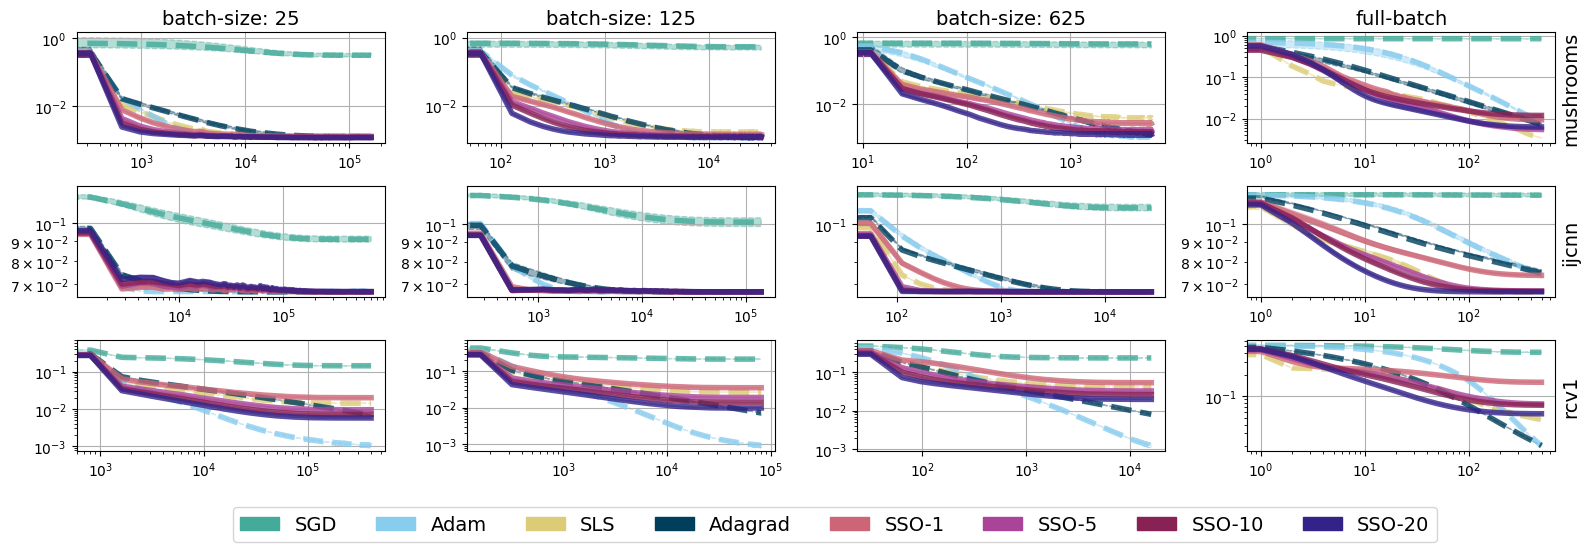

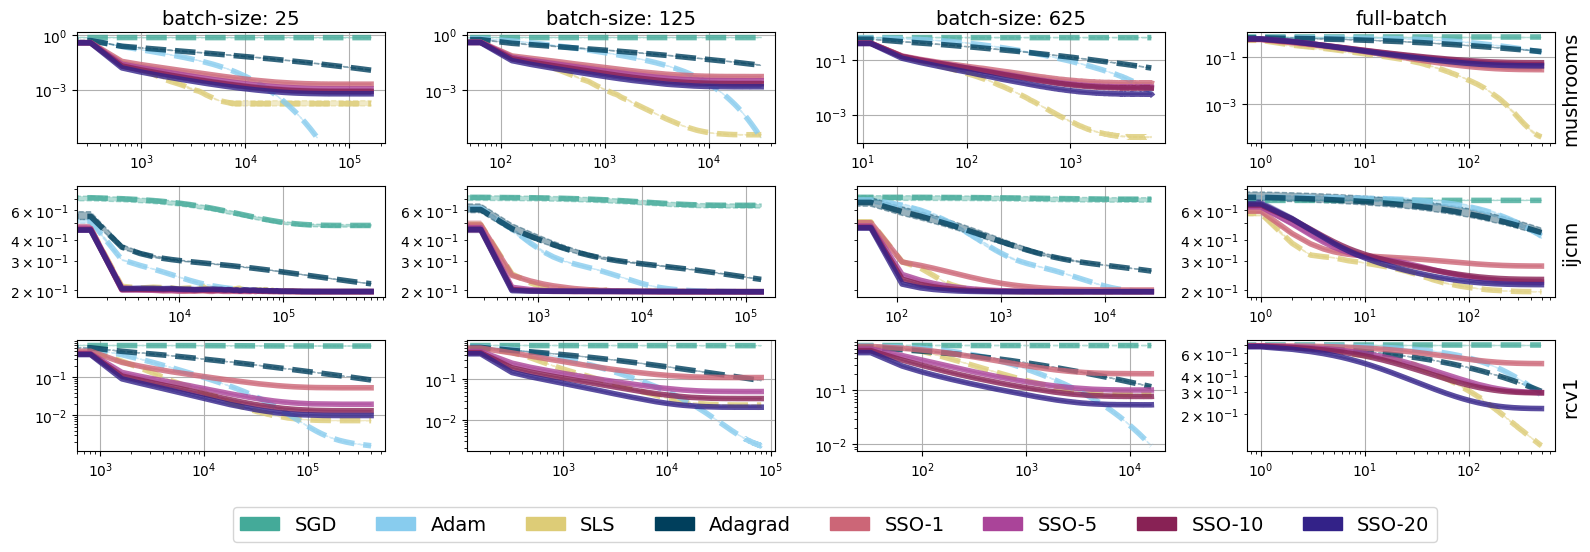

In [104]:
#============================================================================================
# constant step-size decay
#============================================================================================
# loss comparison
print('constant')
generate_appendix_figure('MSELoss', 'constant', wandb_records, 'SGD_FMDOpt',  x ='optim_steps', y='avg_loss')
generate_appendix_figure('BCEWithLogitsLoss', 'constant', wandb_records, 'SGD_FMDOpt',x='optim_steps', y='avg_loss')
# grad-norm comparison
# generate_appendix_figure('MSELoss', 'constant', wandb_records, 'SGD_FMDOpt',  x ='optim_steps', y='grad_norm')
# generate_appendix_figure('BCEWithLogitsLoss', 'constant', wandb_records, 'SGD_FMDOpt', x ='optim_steps', y='grad_norm')
# # time-elapsed comparison
# generate_sls_figure('MSELoss', 'constant', wandb_records, fig_name='a', x ='time_elapsed', y='avg_loss')
# generate_sls_figure('BCEWithLogitsLoss', 'constant', wandb_records, fig_name='a', x ='time_elapsed', y='avg_loss')

#============================================================================================
# stochastic step-size decay
#============================================================================================
# loss comparison
print('stochastic')
generate_appendix_figure('MSELoss', 'stochastic', wandb_records, 'SGD_FMDOpt', x ='optim_steps', y='avg_loss')
generate_appendix_figure('BCEWithLogitsLoss', 'stochastic', wandb_records, 'SGD_FMDOpt',  x='optim_steps', y='avg_loss')
# grad-norm comparison
# generate_appendix_figure('MSELoss', 'stochastic', wandb_records, 'SGD_FMDOpt',  x ='optim_steps', y='grad_norm')
# generate_appendix_figure('BCEWithLogitsLoss', 'stochastic', wandb_records, 'SGD_FMDOpt', x ='optim_steps', y='grad_norm')
# # time-elapsed comparison
# generate_sls_figure('MSELoss', 'constant', wandb_records, fig_name='a', x ='time_elapsed', y='avg_loss')
# generate_sls_figure('BCEWithLogitsLoss', 'constant', wandb_records, fig_name='a', x ='time_elapsed', y='avg_loss')

#============================================================================================
# exponential step-size decay
#============================================================================================
# loss comparison
print('exponential')
generate_appendix_figure('MSELoss', 'exponential', wandb_records, 'SGD_FMDOpt',  x ='optim_steps', y='avg_loss')
generate_appendix_figure('BCEWithLogitsLoss', 'exponential', wandb_records, 'SGD_FMDOpt',  x='optim_steps', y='avg_loss')
# grad-norm comparison
# generate_appendix_figure('MSELoss', 'exponential', wandb_records, 'SGD_FMDOpt',  x ='optim_steps', y='grad_norm')
# generate_appendix_figure('BCEWithLogitsLoss', 'exponential', wandb_records, 'SGD_FMDOpt',  x ='optim_steps', y='grad_norm')
# # time-elapsed comparison
# generate_sls_figure('MSELoss', 'constant', wandb_records, fig_name='a', x ='time_elapsed', y='avg_loss')
# generate_sls_figure('BCEWithLogitsLoss', 'constant', wandb_records, fig_name='a', x ='time_elapsed', y='avg_loss')


constant
missing FMDopt   10 ijcnn 25 MSELoss


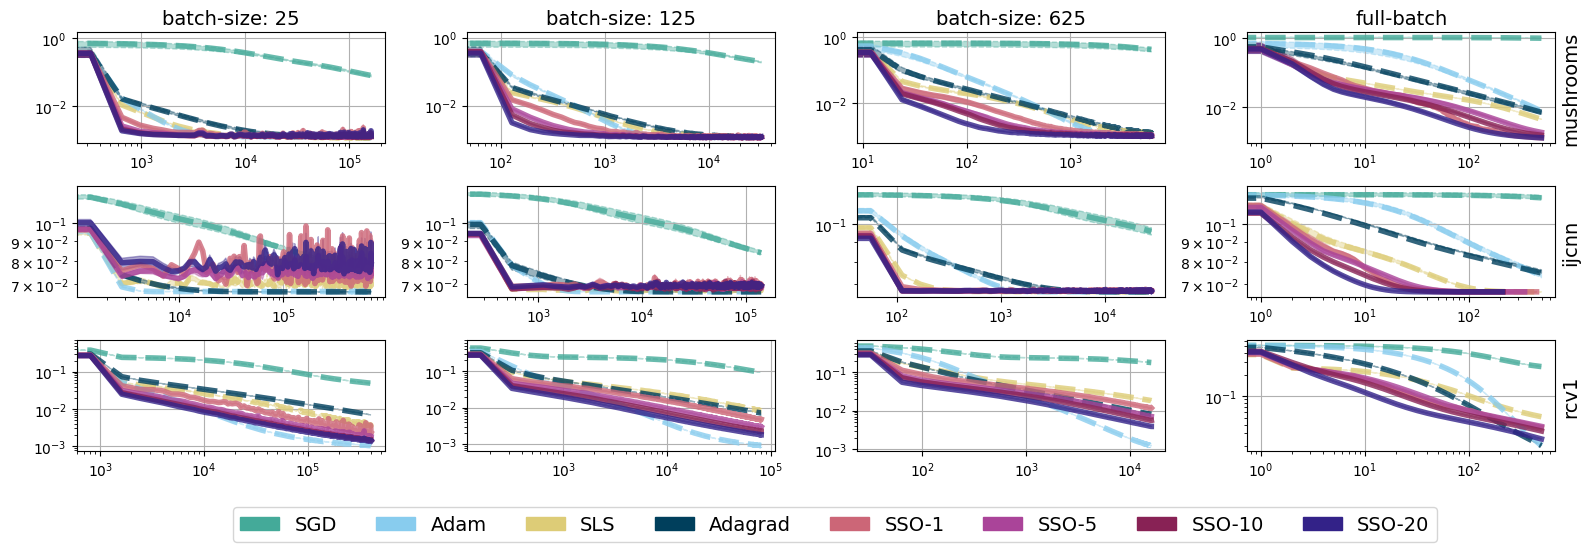

missing FMDopt   1 ijcnn 625 BCEWithLogitsLoss


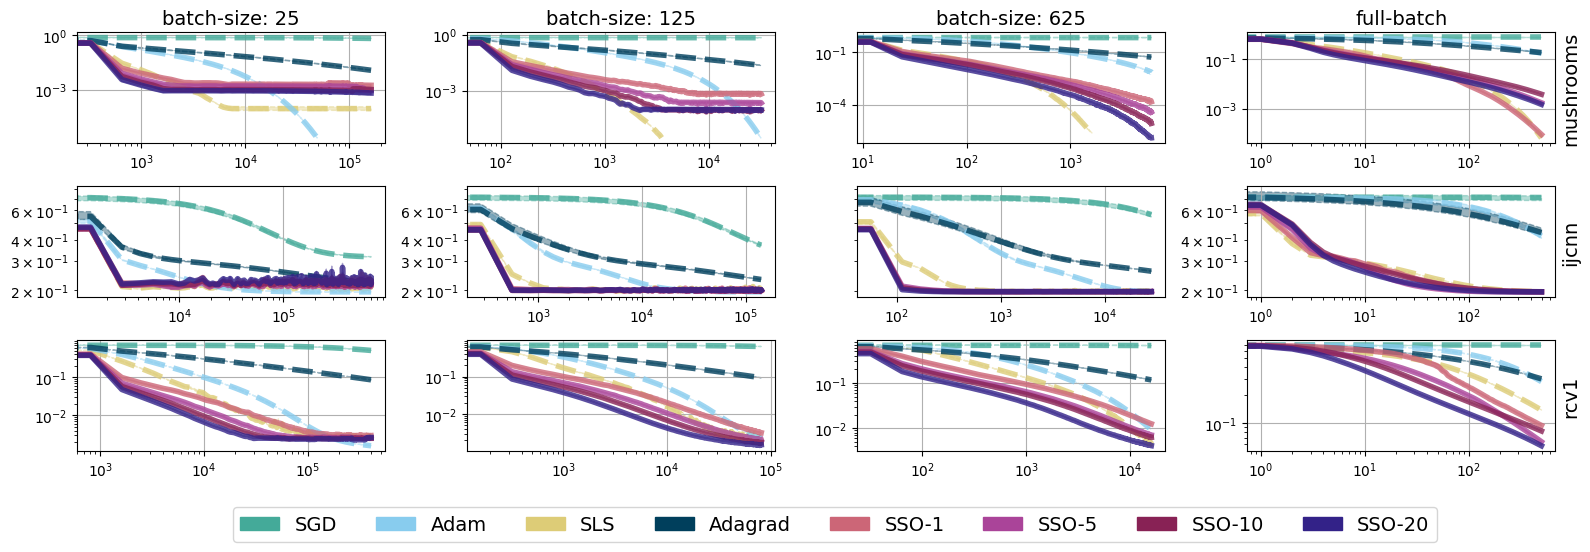

stochastic
missing FMDopt   5 ijcnn full-batch MSELoss
missing FMDopt   20 ijcnn 25 MSELoss


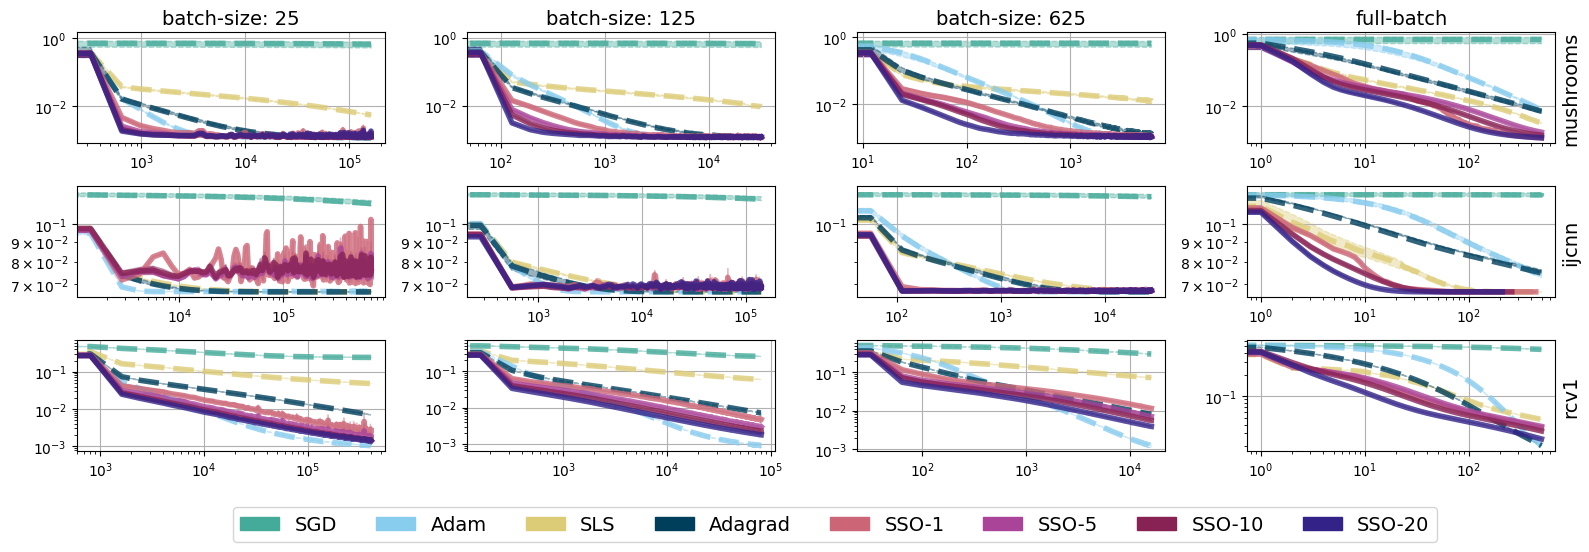

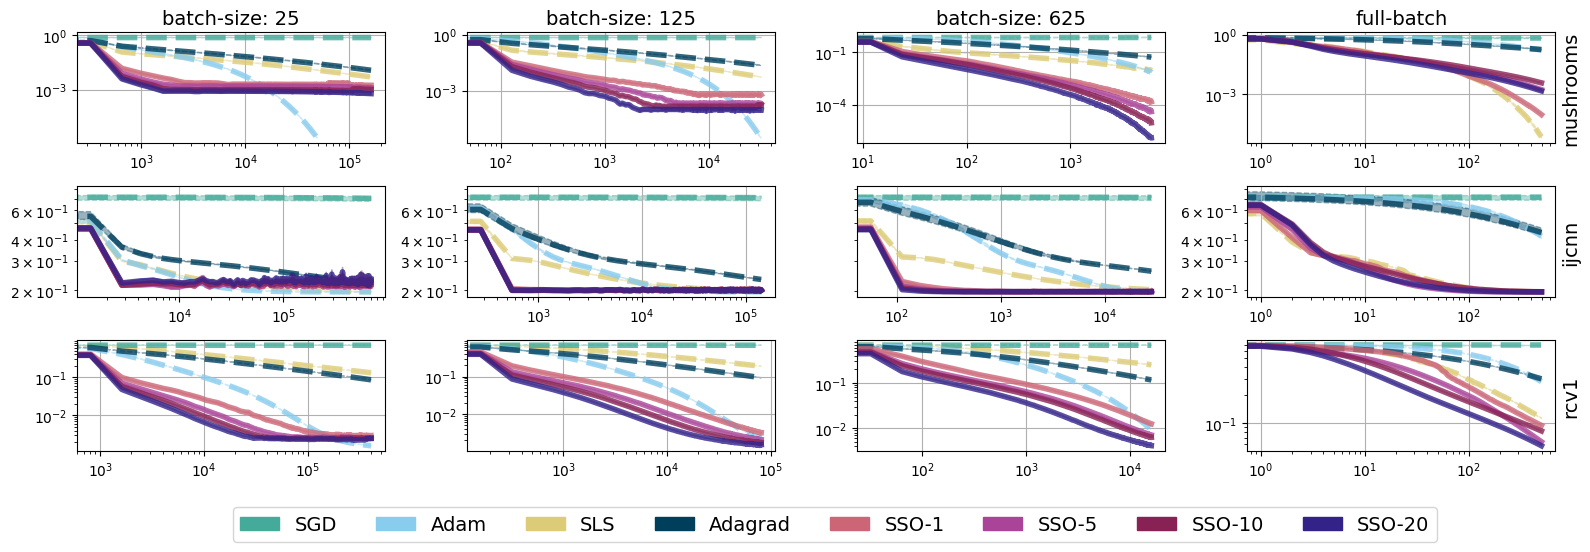

exponential


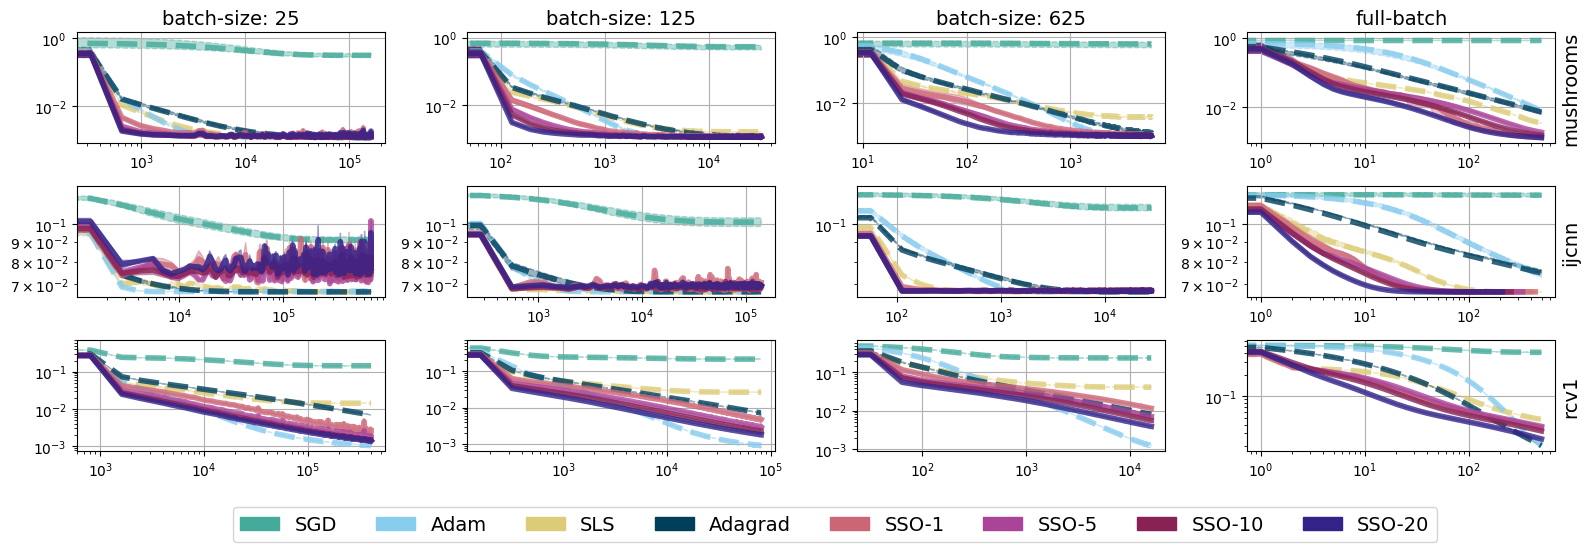

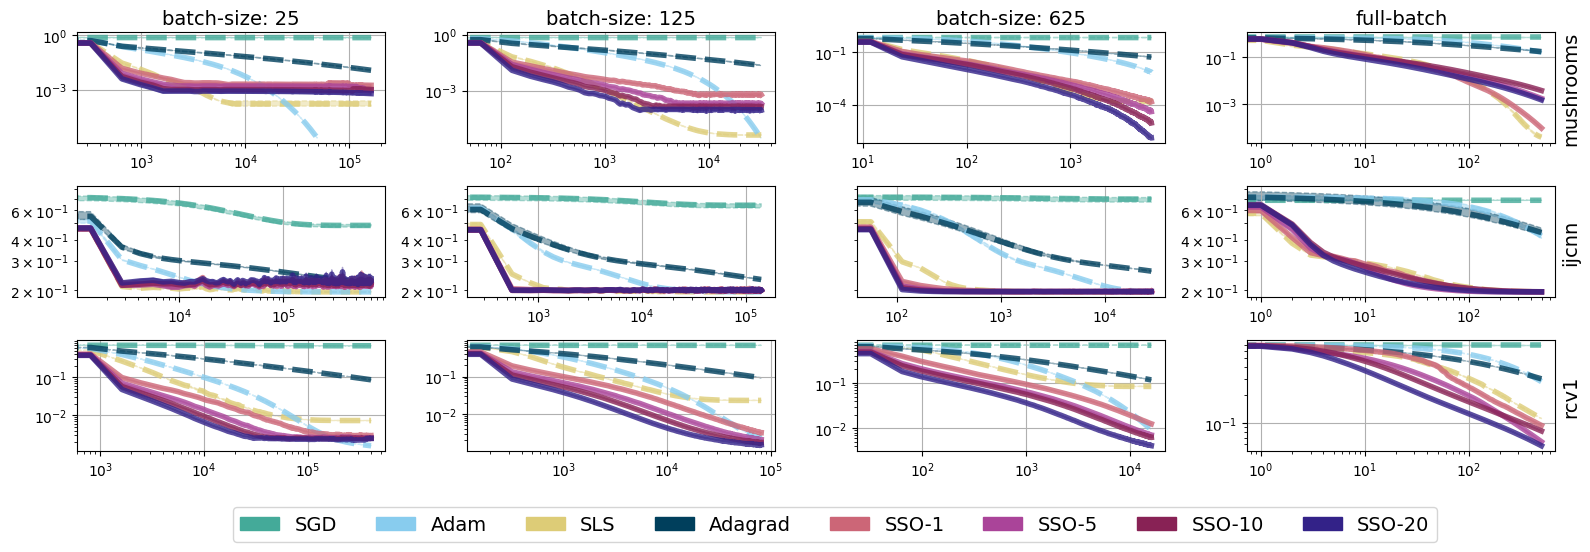

In [113]:
#============================================================================================
# constant step-size decay
#============================================================================================
# loss comparison
print('constant')
generate_appendix_figure('MSELoss', 'constant', wandb_records, 'SLS_FMDOpt',  x ='optim_steps', y='avg_loss')
generate_appendix_figure('BCEWithLogitsLoss', 'constant', wandb_records, 'SLS_FMDOpt', x='optim_steps', y='avg_loss')
# grad-norm comparison
# generate_appendix_figure('MSELoss', 'constant', wandb_records, 'SLS_FMDOpt',  x ='optim_steps', y='grad_norm')
# generate_appendix_figure('BCEWithLogitsLoss', 'constant', wandb_records, 'SLS_FMDOpt',  x ='optim_steps', y='grad_norm')
# # time-elapsed comparison
# generate_sls_figure('MSELoss', 'constant', wandb_records, fig_name='a', x ='time_elapsed', y='avg_loss')
# generate_sls_figure('BCEWithLogitsLoss', 'constant', wandb_records, fig_name='a', x ='time_elapsed', y='avg_loss')

#============================================================================================
# stochastic step-size decay
#============================================================================================
# loss comparison
print('stochastic')
generate_appendix_figure('MSELoss', 'stochastic', wandb_records, 'SLS_FMDOpt',  x ='optim_steps', y='avg_loss')
generate_appendix_figure('BCEWithLogitsLoss', 'stochastic', wandb_records, 'SLS_FMDOpt',  x='optim_steps', y='avg_loss')
# grad-norm comparison
# generate_appendix_figure('MSELoss', 'stochastic', wandb_records, 'SLS_FMDOpt',  x ='optim_steps', y='grad_norm')
# generate_appendix_figure('BCEWithLogitsLoss', 'stochastic', wandb_records, 'SLS_FMDOpt',  x ='optim_steps', y='grad_norm')
# # time-elapsed comparison
# generate_sls_figure('MSELoss', 'constant', wandb_records, fig_name='a', x ='time_elapsed', y='avg_loss')
# generate_sls_figure('BCEWithLogitsLoss', 'constant', wandb_records, fig_name='a', x ='time_elapsed', y='avg_loss')

#============================================================================================
# exponential step-size decay
#============================================================================================
# loss comparison
print('exponential')
generate_appendix_figure('MSELoss', 'exponential', wandb_records, 'SLS_FMDOpt', x ='optim_steps', y='avg_loss')
generate_appendix_figure('BCEWithLogitsLoss', 'exponential', wandb_records, 'SLS_FMDOpt', x='optim_steps', y='avg_loss')
# grad-norm comparison
# generate_appendix_figure('MSELoss', 'exponential', wandb_records, 'SLS_FMDOpt', x ='optim_steps', y='grad_norm')
# generate_appendix_figure('BCEWithLogitsLoss', 'exponential', wandb_records, 'SLS_FMDOpt',  x ='optim_steps', y='grad_norm')
# # time-elapsed comparison
# generate_sls_figure('MSELoss', 'constant', wandb_records, fig_name='a', x ='time_elapsed', y='avg_loss')
# generate_sls_figure('BCEWithLogitsLoss', 'constant', wandb_records, fig_name='a', x ='time_elapsed', y='avg_loss')


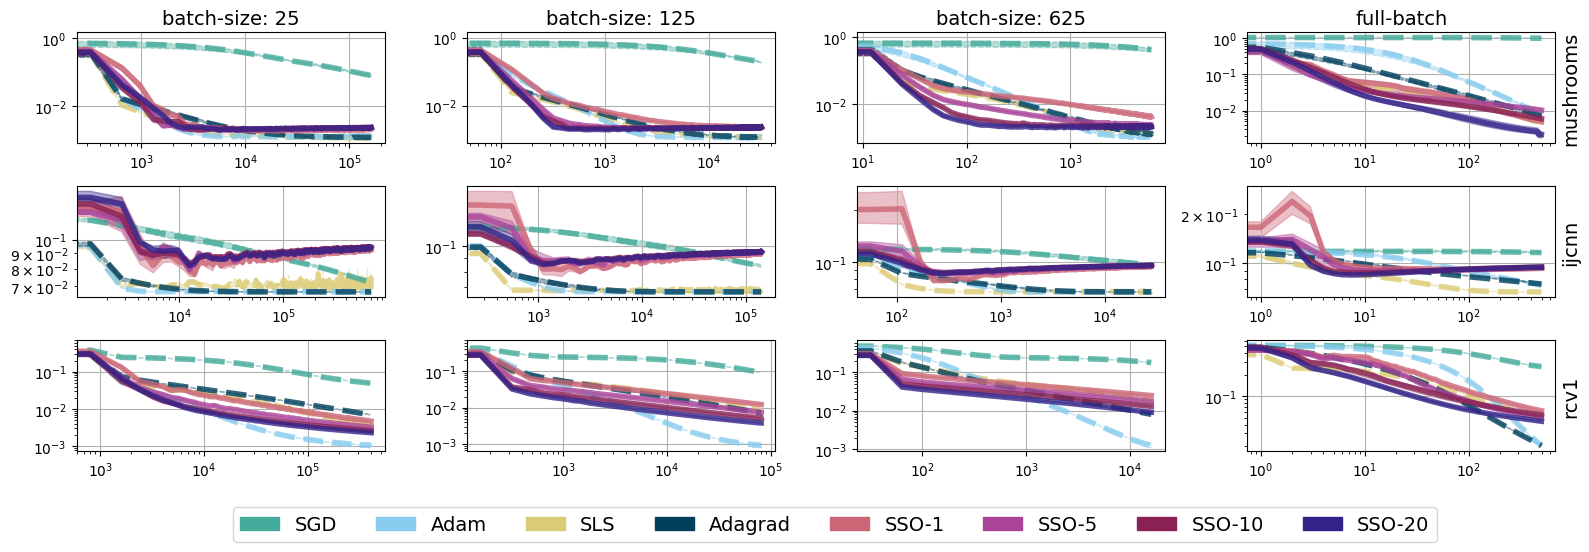

In [ ]:
#============================================================================================
# constant step-size decay
#============================================================================================
# loss comparison
generate_appendix_figure('MSELoss', 'constant', wandb_records, 'Diag_Ada_FMDOpt',  x ='optim_steps', y='avg_loss')
generate_appendix_figure('BCEWithLogitsLoss', 'constant', wandb_records, 'Diag_Ada_FMDOpt',  x='optim_steps', y='avg_loss')
# grad-norm comparison
# generate_appendix_figure('MSELoss', 'constant', wandb_records, 'Diag_Ada_FMDOpt',  x ='optim_steps', y='grad_norm')
# generate_appendix_figure('BCEWithLogitsLoss', 'constant', wandb_records, 'Diag_Ada_FMDOpt',  x ='optim_steps', y='grad_norm')
# # time-elapsed comparison
# generate_sls_figure('MSELoss', 'constant', wandb_records, fig_name='a', x ='time_elapsed', y='avg_loss')
# generate_sls_figure('BCEWithLogitsLoss', 'constant', wandb_records, fig_name='a', x ='time_elapsed', y='avg_loss')

 

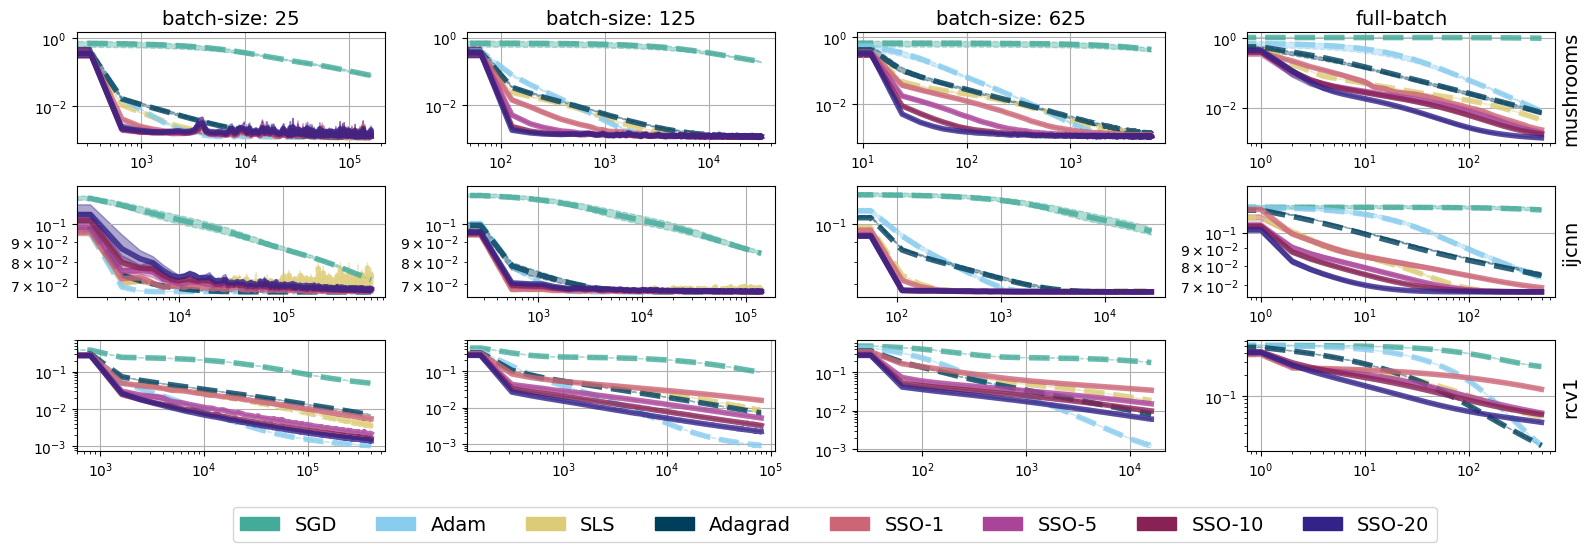

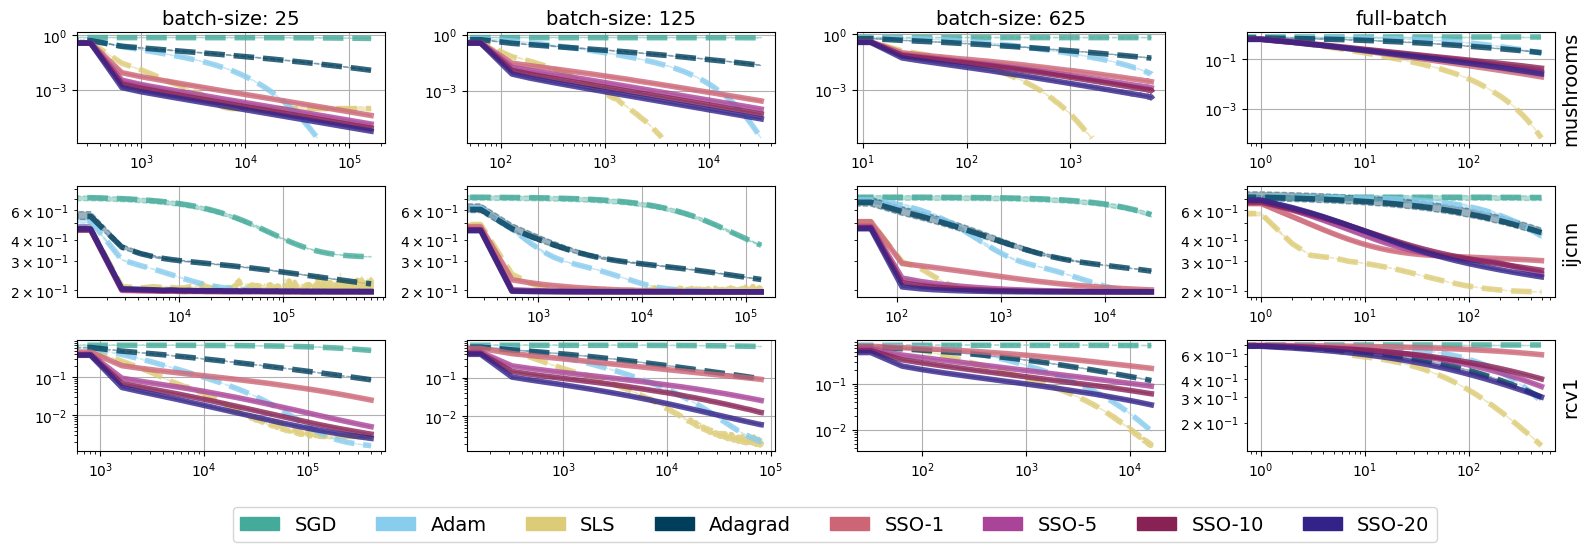

In [102]:
#============================================================================================
# constant step-size decay
#============================================================================================
# loss comparison
generate_appendix_figure('MSELoss', 'constant', wandb_records, 'Ada_FMDOpt', x ='optim_steps', y='avg_loss')
generate_appendix_figure('BCEWithLogitsLoss', 'constant', wandb_records, 'Ada_FMDOpt', x='optim_steps', y='avg_loss')
# grad-norm comparison
# generate_appendix_figure('MSELoss', 'constant', wandb_records, 'Ada_FMDOpt', x ='optim_steps', y='grad_norm')
# generate_appendix_figure('BCEWithLogitsLoss', 'constant', wandb_records, 'Ada_FMDOpt', x ='optim_steps', y='grad_norm')
# # time-elapsed comparison
# generate_sls_figure('MSELoss', 'constant', wandb_records, fig_name='a', x ='time_elapsed', y='avg_loss')
# generate_sls_figure('BCEWithLogitsLoss', 'constant', wandb_records, fig_name='a', x ='time_elapsed', y='avg_loss')
 

constant


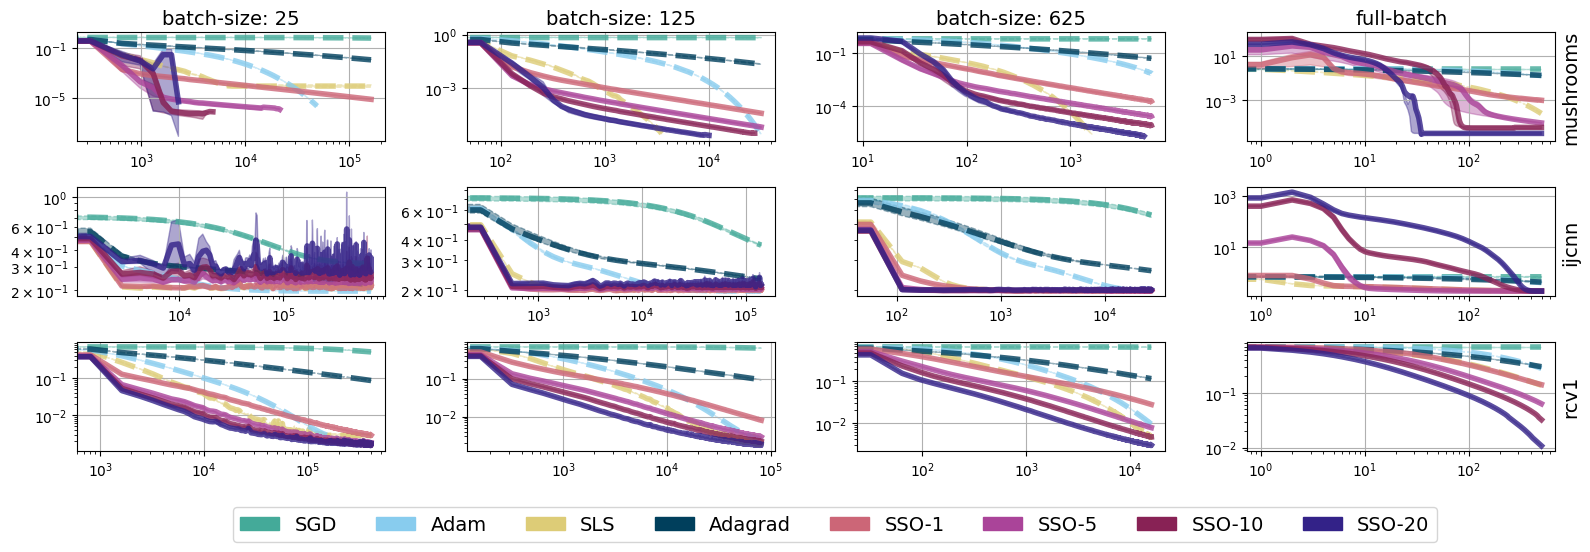

In [103]:
 #============================================================================================
# constant step-size decay
#============================================================================================
# loss comparison
print('constant')
# generate_appendix_figure('MSELoss', 'constant', wandb_records, 'Online_Newton_FMDOpt', x ='optim_steps', y='avg_loss')
generate_appendix_figure('BCEWithLogitsLoss', 'constant', wandb_records, 'Online_Newton_FMDOpt', x='optim_steps', y='avg_loss')
# grad-norm comparison
# generate_appendix_figure('MSELoss', 'constant', wandb_records, 'Online_Newton_FMDOpt', x ='optim_steps', y='grad_norm')
# generate_appendix_figure('BCEWithLogitsLoss', 'constant', wandb_records, 'Online_Newton_FMDOpt', x ='optim_steps', y='grad_norm')
# # time-elapsed comparison
# generate_sls_figure('MSELoss', 'constant', wandb_records, fig_name='a', x ='time_elapsed', y='avg_loss')
# generate_sls_figure('BCEWithLogitsLoss', 'constant', wandb_records, fig_name='a', x ='time_elapsed', y='avg_loss')

#============================================================================================
# stochastic step-size decay
#============================================================================================
# loss comparison
# print('stochastic')
# generate_appendix_figure('MSELoss', 'stochastic', wandb_records, 'Online_Newton_FMDOpt', x ='optim_steps', y='avg_loss')
# generate_appendix_figure('BCEWithLogitsLoss', 'stochastic', wandb_records, 'Online_Newton_FMDOpt', x='optim_steps', y='avg_loss')
# grad-norm comparison
# generate_appendix_figure('MSELoss', 'stochastic', wandb_records, 'Online_Newton_FMDOpt', x ='optim_steps', y='grad_norm')
# generate_appendix_figure('BCEWithLogitsLoss', 'stochastic', wandb_records, 'Online_Newton_FMDOpt', x ='optim_steps', y='grad_norm')
# # time-elapsed comparison
# generate_sls_figure('MSELoss', 'constant', wandb_records, fig_name='a', x ='time_elapsed', y='avg_loss')
# generate_sls_figure('BCEWithLogitsLoss', 'constant', wandb_records, fig_name='a', x ='time_elapsed', y='avg_loss')

#============================================================================================
# exponential step-size decay
#============================================================================================
# loss comparison
# print('exponential')
# generate_appendix_figure('MSELoss', 'exponential', wandb_records, 'Online_Newton_FMDOpt',  x ='optim_steps', y='avg_loss')
# generate_appendix_figure('BCEWithLogitsLoss', 'exponential', wandb_records, 'Online_Newton_FMDOpt', x='optim_steps', y='avg_loss')
# grad-norm comparison
# generate_appendix_figure('MSELoss', 'exponential', wandb_records, 'Online_Newton_FMDOpt', x ='optim_steps', y='grad_norm')
# generate_appendix_figure('BCEWithLogitsLoss', 'exponential', wandb_records, 'Online_Newton_FMDOpt', x ='optim_steps', y='grad_norm')
# # time-elapsed comparison
# generate_sls_figure('MSELoss', 'constant', wandb_records, fig_name='a', x ='time_elapsed', y='avg_loss')
# generate_sls_figure('BCEWithLogitsLoss', 'constant', wandb_records, fig_name='a', x ='time_elapsed', y='avg_loss')